In [ ]:
#| default_exp seaborn
#| nbflags skip_showdoc skip_exec

# seaborn
> A drop-in replacement for `seaborn` that renames all labels from snake_case to Words.

In [ ]:
#| export
import inspect
from functools import wraps
import seaborn
from pdpatch.case import *

In [ ]:
from pdpatch.core import *
import pandas as pd

In [ ]:
#| export
def if_is_else(fun, x, t):
    if isinstance(x, t): return fun(x)
    else: return x

In [ ]:
#| export
def renamer(fun):
    @wraps(fun)
    def _inner(*args, **kwargs):
        new_args = [if_is_else(rename2words_cols_and_index, x, pd.DataFrame) for x in args]
        new_args = [if_is_else(snake2words_if_str, x, str) for x in new_args]
        args = tuple(new_args)
        for k in kwargs:
            kwargs[k] = if_is_else(rename2words_cols_and_index, kwargs[k], pd.DataFrame)
        
        keys = ['x', 'y', 'hue', 'col', 'row', 'size', 'style']
        for k in keys:
            if k in kwargs:
                if is_listy(kwargs[k]):
                    kwargs[k] = [snake2words_if_str(x) for x in kwargs[k]]
                else:
                    kwargs[k] = snake2words_if_str(kwargs[k])
        return fun(*args, **kwargs)
    return _inner

In [ ]:
#| export
class Seaborn:
    '''Like `express` but renames all columns from snake_case to Words.'''
    def __getattr__(self, attr):
        fun = getattr(seaborn, attr)
        return renamer(fun)
    __dir__ = seaborn.__dir__
sns = Seaborn()

<AxesSubplot:xlabel='Time (s)', ylabel='Position (m)'>

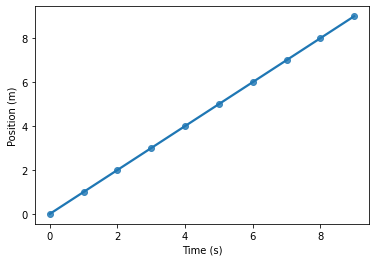

In [ ]:
df = pd.DataFrame({'time__s__': range(10), 'position__m__': range(10)})
sns.regplot(data=df, x='time__s__', y='position__m__')

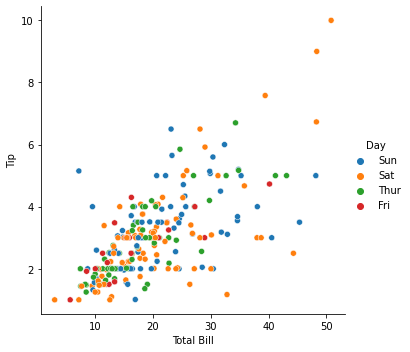

In [ ]:
tips = sns.load_dataset("tips")
sns.relplot(data=tips, x="total_bill", y="tip", hue="day");

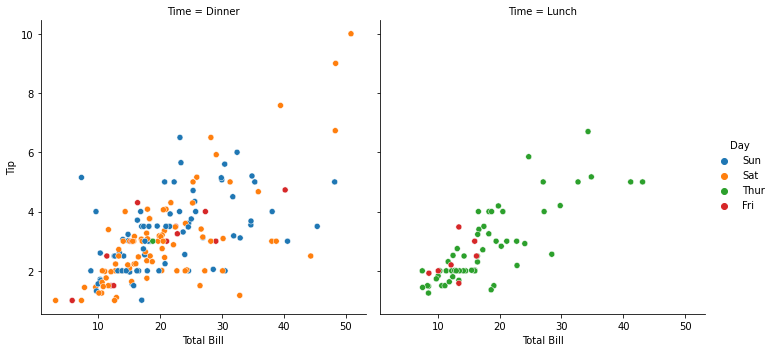

In [ ]:
sns.relplot(data=tips, x="total_bill", y="tip", hue="day", col="time");

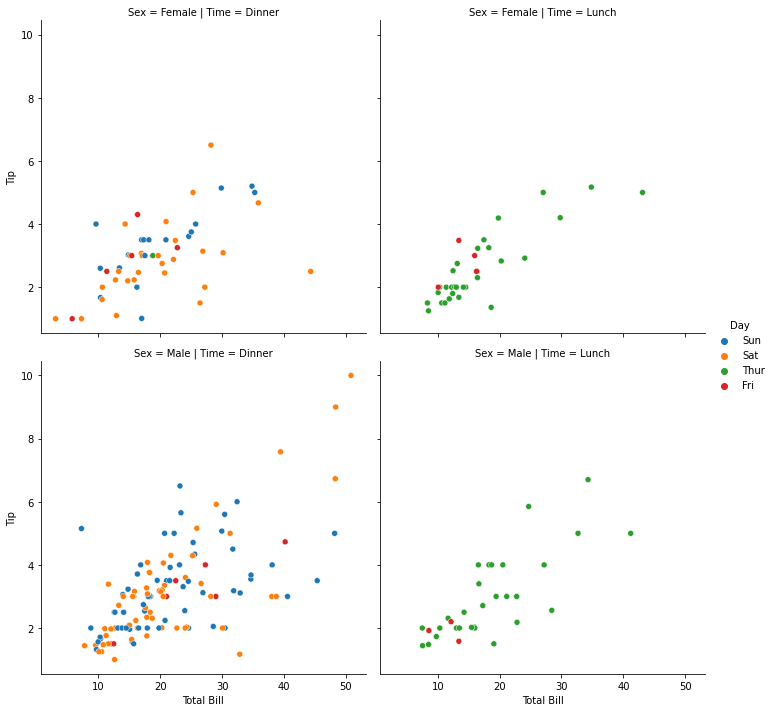

In [ ]:
sns.relplot(data=tips, x="total_bill", y="tip", hue="day", col="time", row="sex")

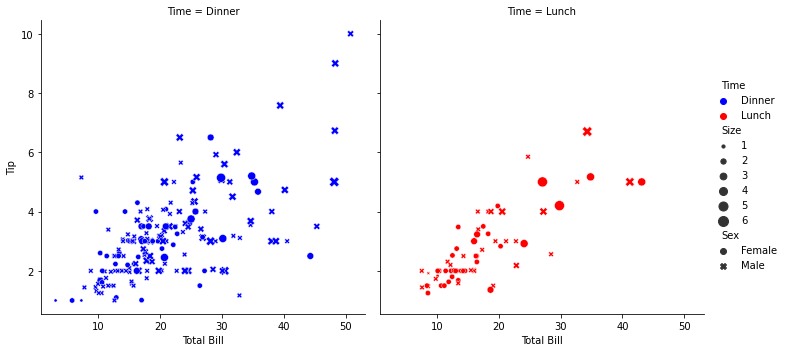

In [ ]:
sns.relplot(
    data=tips, x="total_bill", y="tip", col="time",
    hue="time", size="size", style="sex",
    palette=["b", "r"], sizes=(10, 100)
)

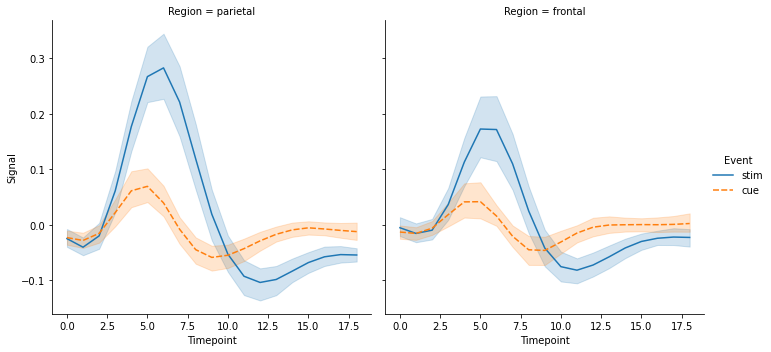

In [ ]:
fmri = seaborn.load_dataset("fmri")
sns.relplot(
    data=fmri, x="timepoint", y="signal", col="region",
    hue="event", style="event", kind="line",
)

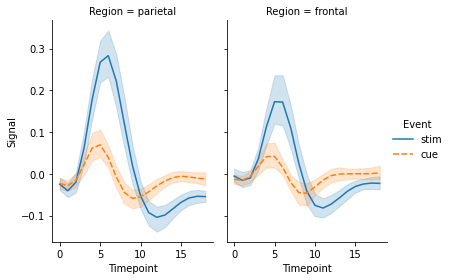

In [ ]:
sns.relplot(
    data=fmri,
    x="timepoint", y="signal",
    hue="event", style="event", col="region",
    height=4, aspect=.7, kind="line"
)

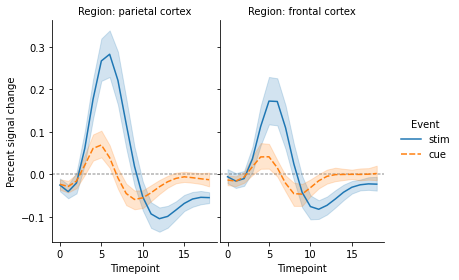

In [ ]:
import matplotlib.pyplot as plt
g = sns.relplot(
    data=fmri,
    x="timepoint", y="signal",
    hue="event", style="event", col="region",
    height=4, aspect=.7, kind="line"
)
(g.map(plt.axhline, y=0, color=".7", dashes=(2, 1), zorder=0)
  .set_axis_labels("Timepoint", "Percent signal change")
  .set_titles("Region: {col_name} cortex")
  .tight_layout(w_pad=0))

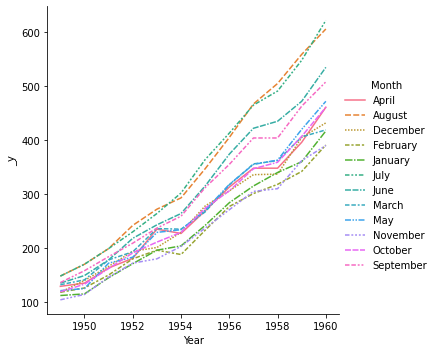

In [ ]:
flights_wide = sns.load_dataset("flights").pivot("year", "month", "passengers")
sns.relplot(data=flights_wide, kind="line")

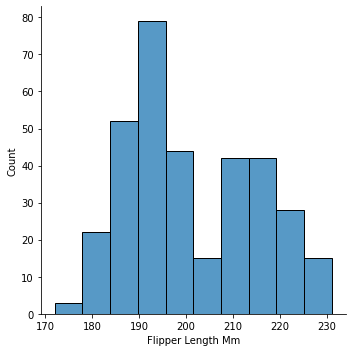

In [ ]:
penguins = sns.load_dataset("penguins")
sns.displot(data=penguins, x="flipper_length_mm");

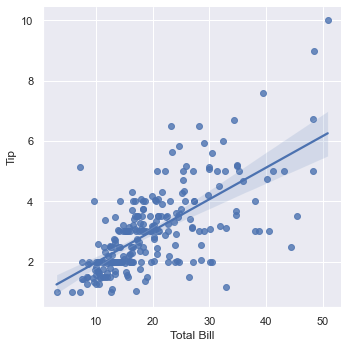

In [ ]:
# import seaborn as sns;
sns.set_theme(color_codes=True)
tips = sns.load_dataset("tips")
g = sns.lmplot(x="total_bill", y="tip", data=tips);

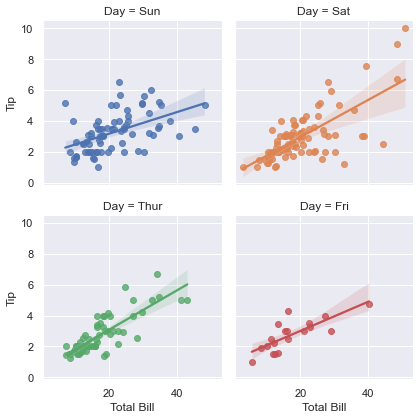

In [ ]:
g = sns.lmplot(x="total_bill", y="tip", col="day", hue="day",
               data=tips, col_wrap=2, height=3);

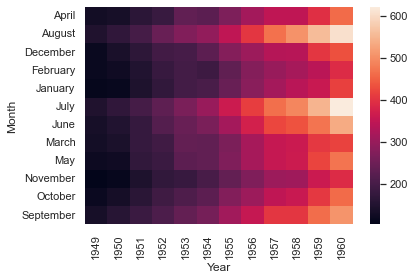

In [ ]:
flights = sns.load_dataset("flights")
flights = flights.pivot("month", "year", "passengers")
ax = sns.heatmap(flights);

If you use `sns.FacetGrid` you will have to use the Word version of the column names in the method `map` and `map_dataframe`.

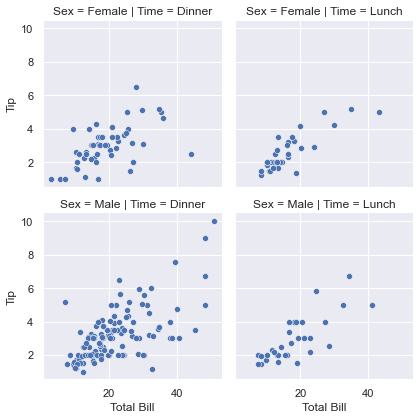

In [ ]:
tips = sns.load_dataset("tips")
g = sns.FacetGrid(tips, col="time",  row="sex")
g.map(sns.scatterplot, "Total Bill", "Tip");

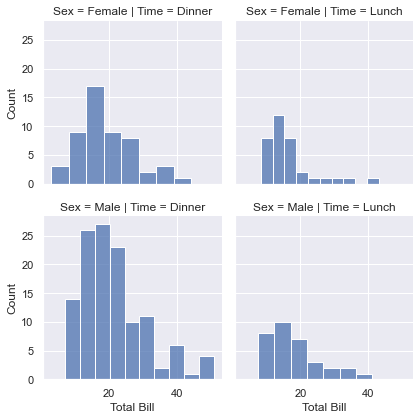

In [ ]:
g = sns.FacetGrid(tips, col="time",  row="sex")
g.map_dataframe(sns.histplot, x="Total Bill");

## Export -

In [ ]:
#|hide
#|eval: false
from nbdev import nbdev_export; nbdev_export()